Task: Data Visualization
Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).
Compare the average ratings of different cuisines or cities using appropriate visualizations.
Visualize the relationship between various features and the target variable to gain insights.

1.Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

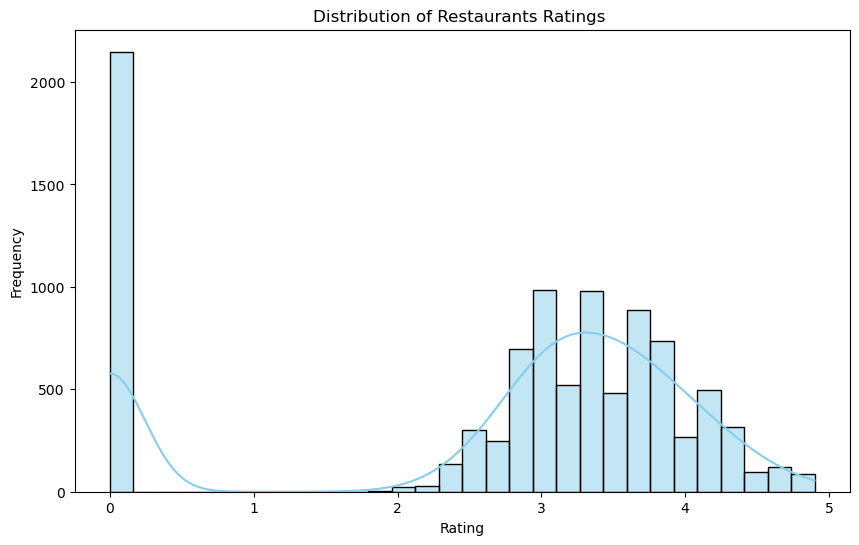

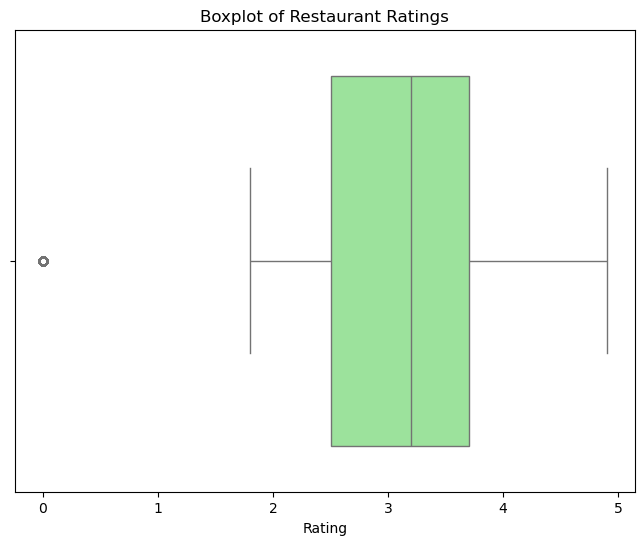

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Dataset .csv')

#Histogram for distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(df['Aggregate rating'],bins=30,kde=True,color='skyblue')
plt.title("Distribution of Restaurants Ratings ")
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#boxplot for distribution of Ratings

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Aggregate rating'], color='lightgreen')
plt.title('Boxplot of Restaurant Ratings')
plt.xlabel('Rating')
plt.show()
           


2.Compare the average ratings of different cuisines or cities using appropriate visualizations.

a. Average rating by cuisine

C:\Users\admin\AppData\Local\Temp\ipykernel_10332\2266093287.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating',y='Cuisines',data=cuisine_rating_sort,palette='coolwarm')


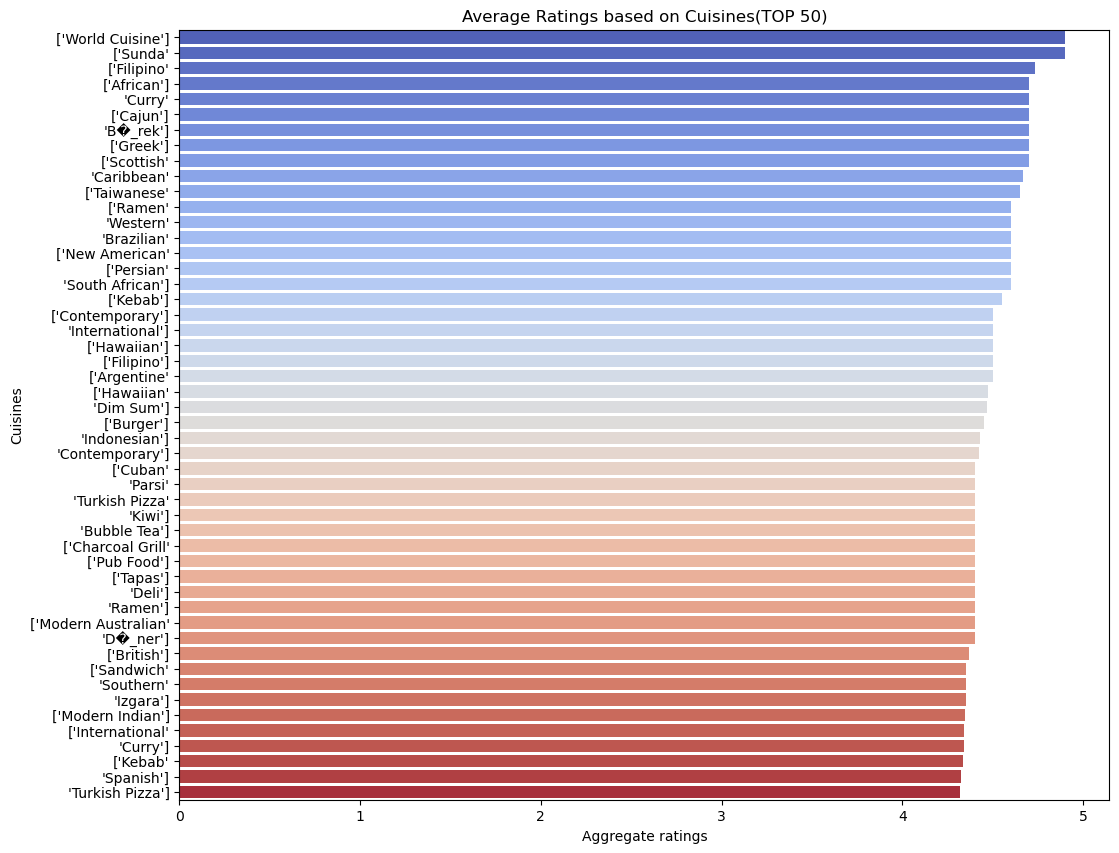

In [5]:
df=df.dropna(subset=['Cuisines','Aggregate rating'])
df['Cuisines']=df['Cuisines'].astype(str).str.split(', ')
df_exploded=df.explode('Cuisines')

cuisine_rating=df_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_rating_sort=cuisine_rating.sort_values(by='Aggregate rating',ascending=False).head(50)

plt.figure(figsize=(12,10))
sns.barplot(x='Aggregate rating',y='Cuisines',data=cuisine_rating_sort,palette='coolwarm')
plt.title('Average Ratings based on Cuisines(TOP 50)')
plt.xlabel('Aggregate ratings')
plt.ylabel('Cuisines')
plt.show()


b,Average Ratings by city

C:\Users\admin\AppData\Local\Temp\ipykernel_10332\2467718367.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating',y='City',data=city_rating_sort,palette='magma')


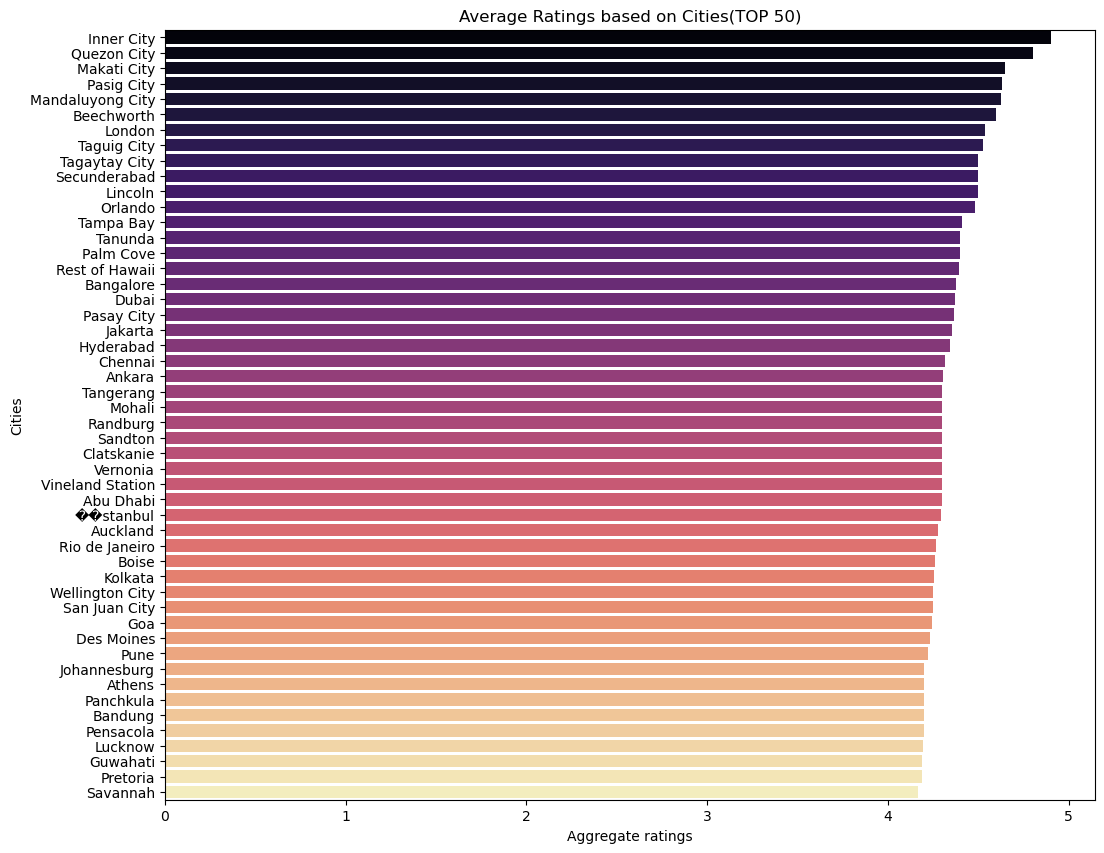

In [9]:
df=df.dropna(subset=['City','Aggregate rating'])


city_rating=df.groupby('City')['Aggregate rating'].mean().reset_index()
city_rating_sort=city_rating.sort_values(by='Aggregate rating',ascending=False).head(50)

plt.figure(figsize=(12,10))
sns.barplot(x='Aggregate rating',y='City',data=city_rating_sort,palette='magma')
plt.title('Average Ratings based on Cities(TOP 50)')
plt.xlabel('Aggregate ratings')
plt.ylabel('Cities')
plt.show()

3.Visualize the relationship between various features and the target variable to gain insights.

a.Scatter Plot (Target Variable(Rating) vs. Average Cost for Two)

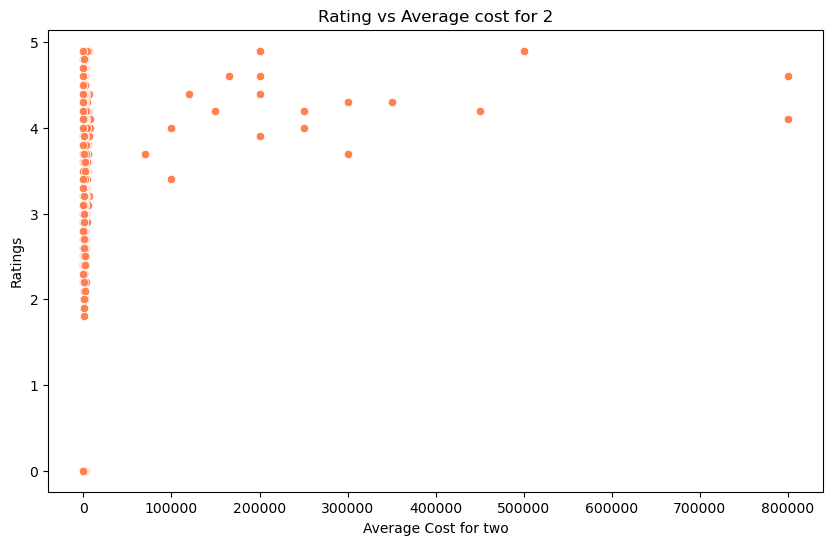

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Average Cost for two',y='Aggregate rating',data=df,color='coral')
plt.title('Rating vs Average cost for 2')
plt.xlabel('Average Cost for two')
plt.ylabel('Ratings')
plt.show()

b.Correlation HeatMap

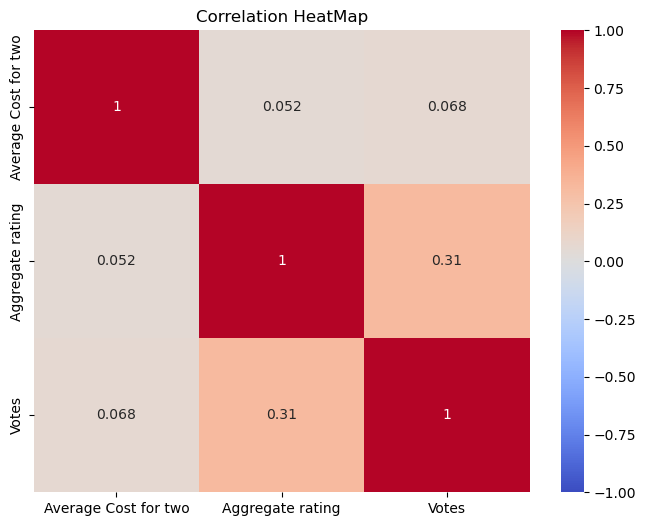

In [13]:
numerical_columns=['Average Cost for two','Aggregate rating','Votes']
coerr_matrix=df[numerical_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(coerr_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation HeatMap')
plt.show()

c.Pair Plot for Multiple Features

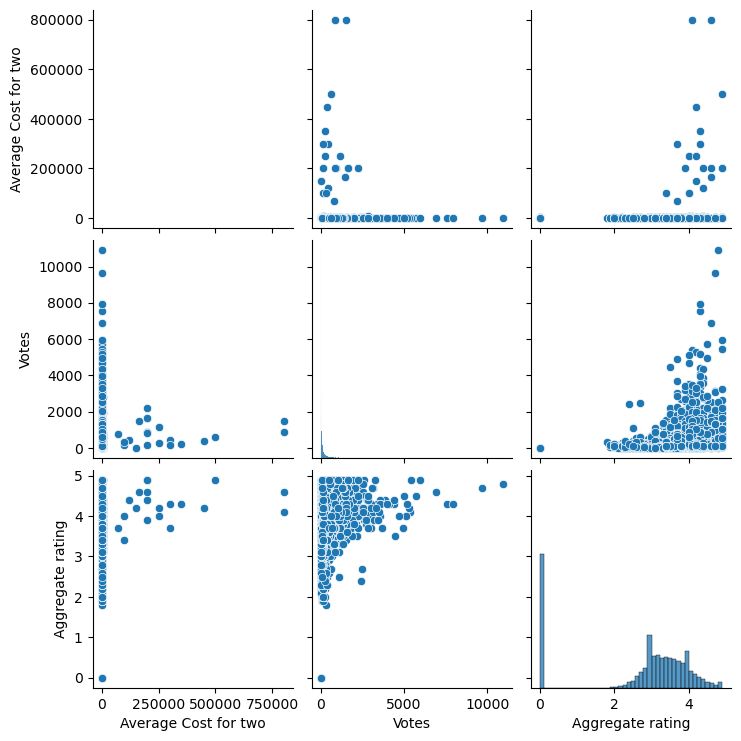

In [19]:
sns.pairplot(df[['Average Cost for two', 'Votes', 'Aggregate rating']])
plt.show()